# Real Estate Data Transformation Pipeline 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

class Analysis:
    """
    This class is used to calculate the price per square foot and the property age.
    calculate_price_per_sqft: calculates the price per square foot of the property
    calculate_property_age: calculates the property age
    get_transformed_data: returns the transformed data
    """
    def __init__(self, file_path):
        self._file_path = file_path
        self._data = pd.read_csv(self._file_path, parse_dates=['Date_Added'])

    def calculate_price_per_sqft(self):
        """
        This function calculates the price per square foot of the property.
        """
        try:
                self._data['Price_per_sqft'] = self._data['Price'] / self._data['Size_sqft']
        except Exception as e:
            print(f"Error: {e}")

    def calculate_property_age(self):
        """
        This function calculates the property age.
        """
        try:
            current_year = datetime.now().year
            self._data['Property_age'] = current_year - self._data['Year_Built']
        except Exception as e:
            print(f"Error: {e}")

    def get_transformed_data(self):
        """
        This function returns the transformed data.
        """
        # print("Transformed data:")
        # print(self._data.head(5))
        return self._data

class Visualization(Analysis):
    """
    This class has visualization methods: 
    plot_price_distribution: plots the price distribution of the property type
    plot_top_locations: plots the top locations of the property
    plot_price_trends: plots the price trends of the property
    """
    def __init__(self, df):
        super().__init__(df)
        super().calculate_price_per_sqft()
        super().calculate_property_age()

    def plot_price_distribution(self, property_type=None):
        """
        This function plots the price distribution of the property type.
        """
        try:
            if property_type:
                data = self._data[self._data['Type'] == property_type]

            plt.figure(figsize=(10, 6))
            sns.boxplot(y='Type', x='Price', data=data)
            plt.title(f'Price Distribution {"for " + property_type if property_type else "by Property Type"}')
            plt.xticks(rotation=45)
            plt.show()
        except Exception as e:
            print(f"Error: {e}")
    
    def plot_top_locations(self, num_locations=5):
        """
        This function plots the top locations of the property.
        """
        try:
            top_locations = self._data['Location'].value_counts().head(num_locations)
            plt.figure(figsize=(10, 6))
            sns.barplot(x=top_locations.index, y=top_locations.values)
            plt.title(f'Top {num_locations} Locations')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()
        except Exception as e:
            print(f"Error: {e}")

    def plot_price_trends(self):
        """
        This function plots the price trends of the property.
        """
        try:
            # Scatter plot for price per sqft and size sqft
            plt.figure(figsize=(10, 6))
            sns.scatterplot(x="Price_per_sqft", y="Size_sqft", data = self._data)
            plt.title('Price Trends')
            plt.xlabel('Price per sqft')
            plt.ylabel('Size sqft')
            plt.show()


            # Extract year from the date
            self._data['Year'] = self._data['Date_Added'].dt.year

            # Group by year and calculate average price
            yearly_avg_price = self._data.groupby('Year')['Price'].mean().reset_index()

            # Line chart showing average price trends by year
            plt.figure(figsize=(10, 6))
            sns.lineplot(data=yearly_avg_price, x='Year', y='Price', marker='o')
            plt.title('Average Property Price Trends by Year')
            plt.xlabel('Year')
            plt.ylabel('Average Price')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()

        except Exception as e:
            print(f"Error: {e}")


In [2]:
# Load cleaned data
file_path = "data/cleaned_housing_data.csv"

# Analysis
a1 = Analysis(file_path)
a1.calculate_price_per_sqft()
a1.calculate_property_age()
a1.get_transformed_data()


,Property_ID,Location,Type,Price,Bedrooms,Bathrooms,Size_sqft,Year_Built,Sold,Date_Added,Agent_ID,Listing_Type,HOA_Fee,Parking_Spaces,Garage,Pool,Lot_Size_acres,Days_on_Market,Price_per_sqft,Property_age
0,PROP00001,Chicago,House,327539.000,2.000000,3.0,1572.000000,1959,0,2024-05-13,AGT0007,For Rent,0.000000,2,0,0,0.05,171,208.358142,66
1,PROP00002,Miami,House,391371.000,5.000000,3.0,2197.000000,1970,0,2025-05-14,AGT0053,For Rent,300.000000,2,1,0,0.58,214,178.138826,55
2,PROP00003,Los Angeles,Condo,318609.000,3.000000,3.0,1630.000000,2019,1,2025-04-01,AGT0075,For Rent,149.141801,1,0,0,0.11,180,195.465644,6
3,PROP00004,Miami,Apartment,429625.000,1.000000,3.0,1233.000000,1983,0,2023-11-17,AGT0114,For Rent,149.141801,1,1,1,0.49,76,348.438767,42
4,PROP00005,Miami,Condo,3016324.057,1.000000,0.0,7467.705263,1961,0,2025-04-24,AGT0063,For Sale,300.000000,0,1,1,0.60,78,403.915788,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,PROP09996,San Francisco,Condo,390727.000,2.990842,2.0,1060.000000,1964,0,2024-04-10,AGT0078,For Rent,0.000000,3,0,0,0.53,228,368.610377,61
9996,PROP09997,Los Angeles,House,350478.000,2.000000,4.0,2745.000000,1953,1,2024-06-12,AGT0168,For Rent,300.000000,1,0,0,0.30,178,127.678689,72
9997,PROP09998,San Francisco,House,232412.000,2.000000,2.0,2381.000000,1968,1,2023-10-21,AGT0084,For Rent,200.000000,1,0,0,0.15,259,97.611088,57
9998,PROP09999,Chicago,House,317020.000,4.000000,2.0,2469.000000,2013,0,2024-03-02,AGT0116,For Rent,0.000000,3,1,1,0.50,135,128.400162,12


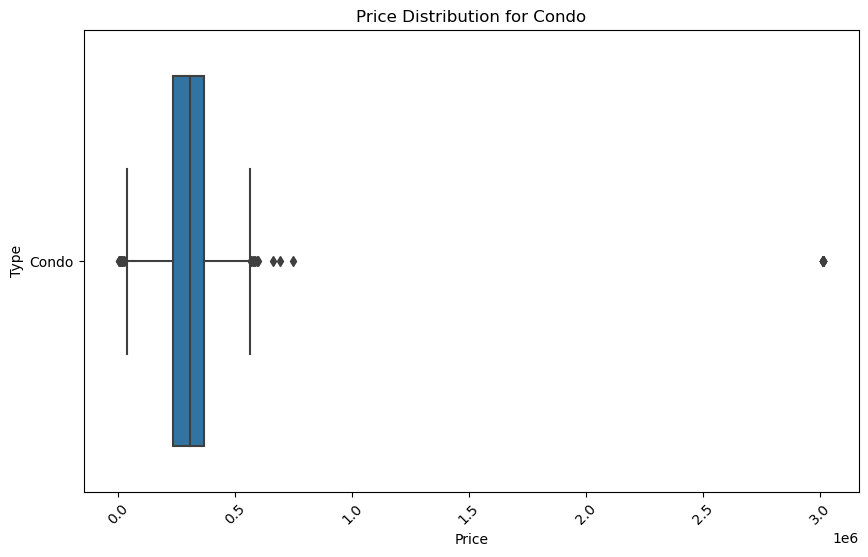

In [3]:
# Visualization
v1 = Visualization(file_path)
v1.plot_price_distribution('Condo') # House, Apartment, Condo

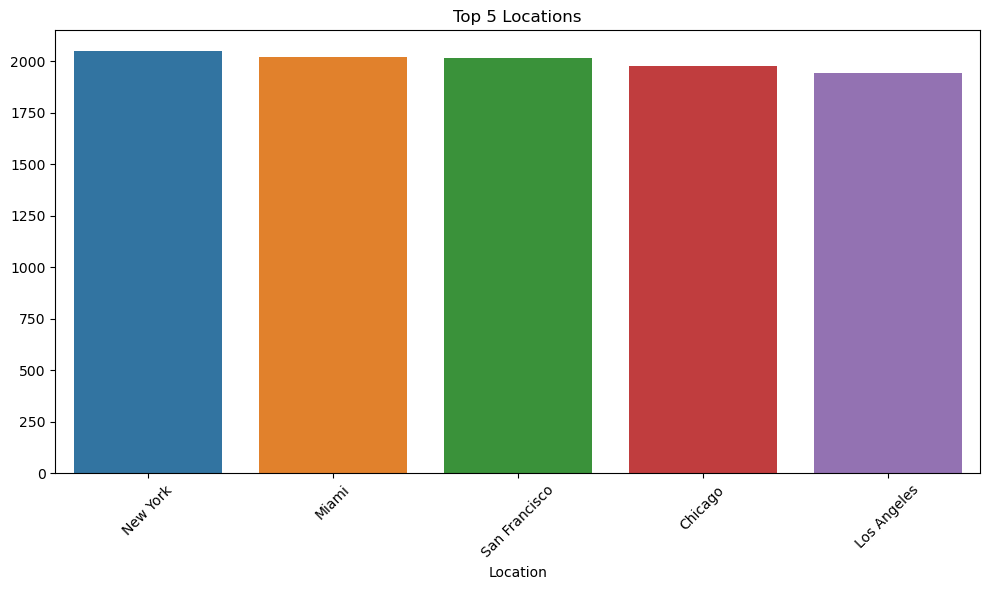

In [4]:
# Default num_locations = 5, available num_locations: 0-5
v1.plot_top_locations(num_locations=5) 

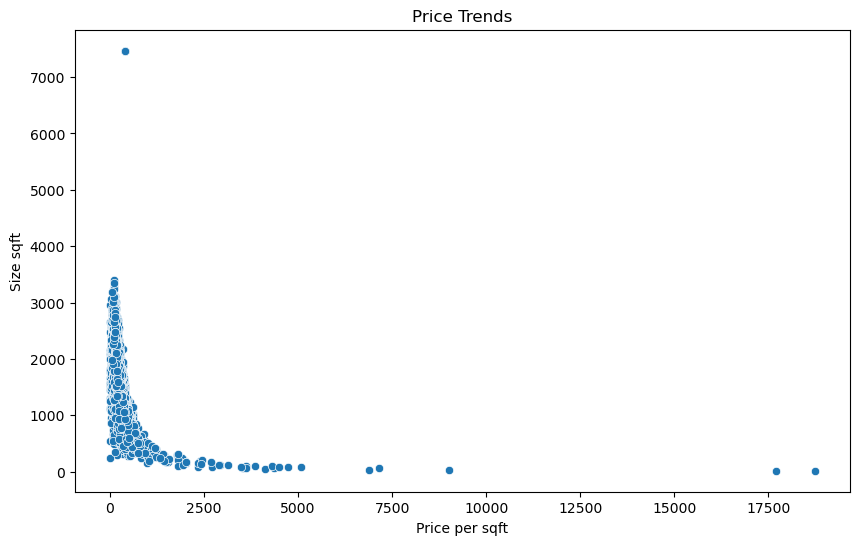

/Users/ssp/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ssp/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


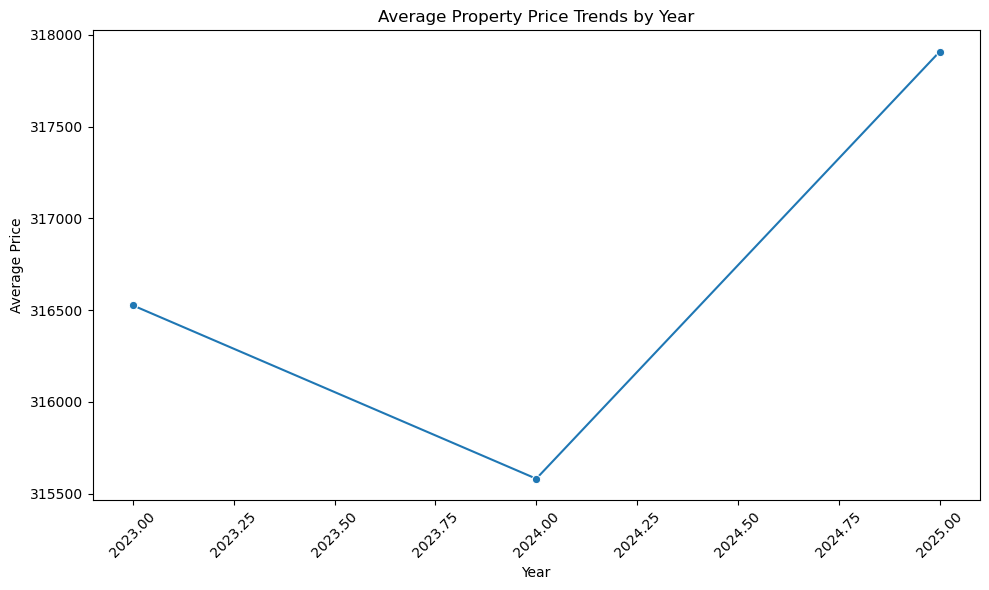

In [5]:
v1.plot_price_trends()